## Final Project Submission

Please fill out: 
* Student name: Sally Kinyanjui
* Student pace:Full time Hybrid
* Scheduled project review date/time: 20/03/2024
* Instructor name: Nikita Njoroge
* Blog post URL: 


## MOVIE STUDIO PROJECT ANALYSIS

## Problem statement

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

## Business Understanding

As a data scientist specializing in movie industry analysis, I recognize the network of stakeholders involved,extensive web of participants,including the production companies and also the viewers. The success of a movie is based on various factors including the quality of the script, marketing strategies and the release date and the competiton it gets from other movies. Nonetheless, some genres tend to perform better than others.

 Therefore for us to be able analyze the data we are needed to gather the data from various sources including reviews.We need a combination of quantitative and qualitative analysis to tackle these problems.By analysing and understanding these data we can help the production industry at large in making more informed decisions and how to go about them resulting to more success in the industry.

## Objectives
 Help Microsoft make their new movie studio to a successful project by exploring the data provided,cleaning it ,analysing it ,gathering insights and making the necessary changes.


## Data Understanding.

The datasets that will be used in this notebook are:
1.im.db
2.bom.movie_gross.csv.gz

imdb dataset contains 8 tables which are:
No.	Table
1	movie_basics
2	directors
3	known_for
4	movie_akas
5	movie_ratings
6	persons
7	principals
8	writers

We start by first importing the relevant libraries and modules:

In [1]:
#importing libraries
import pandas as pd
import sqlite3
import csv
import os
import numpy as np
from datetime import datetime

In [2]:
#importing data visualization tools
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

The datasets are stored in the 'zippedData' folder and were sourced from:

1.https://www.boxofficemojo.com/
2.https://www.imdb.com/
3.https://www.rottentomatoes.com/
4.https://www.themoviedb.org/
5.https://www.the-numbers.com/

## Loading the datasets 

1.Loading the data from Box Office Mojolinks

In [3]:
import pandas as pd

movies_gross= pd .read_csv('zippedData/bom.movie_gross.csv.gz' )
path =('zippedData/bom.movie_gross.csv.gz' )
movies_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


#2.Loading the datasets from tn.movie_budgets.csv into a dataframe.

In [4]:
import pandas as pd
movie_budget = pd.read_csv ('zippedData/tn.movie_budgets.csv.gz')
movie_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


 3.Loading the Rotten Tomatoes Links  

In [5]:
import pandas as pd
movies_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz', delimiter='\t',encoding='unicode_escape')
movies_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


 4 Loading the TheMovieDBLinks

In [6]:
tmdb =pd.read_csv('zippedData/tmdb.movies.csv.gz', index_col=4)
tmdb

,Unnamed: 0,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count
original_title,,,,,,,,,
Harry Potter and the Deathly Hallows: Part 1,0,"[12, 14, 10751]",12444,en,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
How to Train Your Dragon,1,"[14, 12, 16, 10751]",10191,en,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
Iron Man 2,2,"[12, 28, 878]",10138,en,28.515,2010-05-07,Iron Man 2,6.8,12368
Toy Story,3,"[16, 35, 10751]",862,en,28.005,1995-11-22,Toy Story,7.9,10174
Inception,4,"[28, 878, 12]",27205,en,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
Laboratory Conditions,26512,"[27, 18]",488143,en,0.600,2018-10-13,Laboratory Conditions,0.0,1
_EXHIBIT_84xxx_,26513,"[18, 53]",485975,en,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
The Last One,26514,"[14, 28, 12]",381231,en,0.600,2018-10-01,The Last One,0.0,1


5 Loading the data from reviews.

In [7]:
reviews = pd.read_csv('zippedData/rt.reviews.tsv.gz', delimiter='\t',encoding='unicode_escape')
reviews

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


6 Loading the data from IMDB links

(a) First import the zipfile module.
- This will help unzip the data.

In [8]:
import zipfile

(b) extract files and move them to the current working directory.

In [9]:
#extract files from 'im.db.zip' to the current working directory
with zipfile.ZipFile('zippedData/im.db.zip','r') as zip_ref:
    zip_ref.extractall(path='zippedData')

In [10]:
# create a connection.
conn = sqlite3.connect('zippedData/im.db')

For now we are going to extract two tables just to analyze them and also assign them to variables:

In [11]:
movie_basics = pd.read_sql("SELECT* FROM movie_basics;",conn)
movie_rating = pd.read_sql("SELECT* FROM movie_ratings;",conn)

print(movie_basics)

         movie_id                                primary_title  \
0       tt0063540                                    Sunghursh   
1       tt0066787              One Day Before the Rainy Season   
2       tt0069049                   The Other Side of the Wind   
3       tt0069204                              Sabse Bada Sukh   
4       tt0100275                     The Wandering Soap Opera   
...           ...                                          ...   
146139  tt9916538                          Kuambil Lagi Hatiku   
146140  tt9916622  Rodolpho Teóphilo - O Legado de um Pioneiro   
146141  tt9916706                              Dankyavar Danka   
146142  tt9916730                                       6 Gunn   
146143  tt9916754               Chico Albuquerque - Revelações   

                                     original_title  start_year  \
0                                         Sunghursh        2013   
1                                   Ashad Ka Ek Din        2019   
2     

In [12]:
print(movie_rating)

         movie_id  averagerating  numvotes
0      tt10356526            8.3        31
1      tt10384606            8.9       559
2       tt1042974            6.4        20
3       tt1043726            4.2     50352
4       tt1060240            6.5        21
...           ...            ...       ...
73851   tt9805820            8.1        25
73852   tt9844256            7.5        24
73853   tt9851050            4.7        14
73854   tt9886934            7.0         5
73855   tt9894098            6.3       128

[73856 rows x 3 columns]


#3.Data Cleaning

* This involves identifying and correcting or removing errors, inconsistencies, and inaccuracies in a datase.



3.(a) So we will clean data from Box Office Mojo


In [13]:
#For the first 5 rows. 5 here is our index.
movies_gross.head ()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [14]:
# Give summary of the Box Office Mojo
movies_gross.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [15]:
# Now we will give the summary of the Box Office Mojo 
movies_gross .describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


* DUPLICATES METHOD.
You can use the duplicated method to identify duplicate entries in the dataset. This method returns a boolean array with "True" values for all the duplicated rows, and "False" for the unique ones.

In [16]:
#To check for duplicates.
movies_gross.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3382    False
3383    False
3384    False
3385    False
3386    False
Length: 3387, dtype: bool

We can then check for null values and also count the total number of null values.

In [17]:
#To check for null values
null_count = movies_gross.isnull().sum()
null_count

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [18]:
#Checking number of null values.
total_count = movies_gross.shape[0]
total_count

3387

We can also look for the percentage of the null values by multiplying by 100.

In [19]:
percentage_count =(null_count/total_count)*100 
percentage_count

title              0.000000
studio             0.147623
domestic_gross     0.826690
foreign_gross     39.858282
year               0.000000
dtype: float64

Here we see the total number of columns are 5.

Float is a number with a decimal place.

In [20]:
# Drop missing values from studio because they are only 5 
# We do this using the dropna()function

movies_gross .dropna(subset=['studio'],inplace =True)

In [21]:
#We can now look at the summary
movies_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3382 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3382 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   2033 non-null   object 
 4   year            3382 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 158.5+ KB


In [22]:
#Replace the data in the column to commas from the string representation.
movies_gross['foreign_gross'] = movies_gross['foreign_gross'].str.replace(',','')
movies_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [23]:
#Change the data type for column studio to float
movies_gross['foreign_gross'] = movies_gross['foreign_gross'].astype(float)
movies_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [24]:
#We can now check the summary by introducing info()
movies_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3382 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3382 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   2033 non-null   float64
 4   year            3382 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 158.5+ KB


(b) We will then clean data from the numbers.

So we will first generate the first rows of movie budget.
Then get a summary of the data,convert columns to float values from strings and we will then get a summary of movie budget after making changes.


In [25]:
movie_budget .head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [26]:
# Summary of the data
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [27]:
# Convert columns to float values from strings 
float_values= ['production_budget','domestic_gross','worldwide_gross']
float_values

['production_budget', 'domestic_gross', 'worldwide_gross']

In [28]:
#Remove non-numeric values
float_values= ['production_budget','domestic_gross','worldwide_gross']
for col in float_values:
       movie_budget[col] = movie_budget[col].str.replace(r'\D', '', regex = True).astype(float)
movie_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00


In [29]:
# Summarize the budget after making those changes.
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


(c) Cleaning TheMovieDB Links

In [30]:
tmdb.head() 

,Unnamed: 0,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count
original_title,,,,,,,,,
Harry Potter and the Deathly Hallows: Part 1,0,"[12, 14, 10751]",12444,en,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
How to Train Your Dragon,1,"[14, 12, 16, 10751]",10191,en,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
Iron Man 2,2,"[12, 28, 878]",10138,en,28.515,2010-05-07,Iron Man 2,6.8,12368
Toy Story,3,"[16, 35, 10751]",862,en,28.005,1995-11-22,Toy Story,7.9,10174
Inception,4,"[28, 878, 12]",27205,en,27.920,2010-07-16,Inception,8.3,22186


In [31]:
# Summary of the data
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26517 entries, Harry Potter and the Deathly Hallows: Part 1 to The Church
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 2.0+ MB


In [32]:
# Count the languages.
tmdb['original_language'].value_counts()

en    23291
fr      507
es      455
ru      298
ja      265
      ...  
kk        1
sw        1
bo        1
yi        1
dz        1
Name: original_language, Length: 76, dtype: int64

In [33]:
# Check the number of duplicates
tmdb.duplicated().sum()

0

Here we won't drop the duplicates since there are none.

In [34]:
# Check for null values.
tmdb.isnull() .sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

(d) Data cleaning from reviews.

In [35]:
#List the first rows.
reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [36]:
# Summarize the data.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [37]:
# We'll first check for the null values.
null_count= reviews.isnull().sum()
null_count


id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

In [38]:
# Checking duplicates 
reviews.duplicated().sum()

9

After checking for duplicates we are going to drop the duplicates using the dropna()function.

In [39]:
reviews.dropna(axis=0,inplace=True)

(e) Data cleaning IMDB Links
* Here we are going to clean data from the movie_basics and also from the movie_rating.

1. Let us first data clean from the movie_basics.
We will just use the steps we used in other data sets.

In [40]:
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


As seen in the cleaning of other datasets .head() lists the first rows. 

In [41]:
# Summary of movie_basics
movie_basics. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [42]:
# Checking for null values
movie_basics.isnull().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [43]:
# drop the non values
movie_basics.dropna(inplace = True)

In [44]:
#Now check for duplicates.
movie_basics.duplicated().sum()

0

2. We will now clean the movie_ratings.

In [45]:
#List the first rows
movie_rating.head()


,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [46]:
# Give the summary of the data of the first five rows.
#info()
movie_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [47]:
#Next check for null values
movie_rating.isnull().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

By looking at the output given we can see very well that we do not have null values here so, there wont be need to dropping null values. But we can check whether we have duplicates,so:


In [48]:
# Check for duplicates
movie_rating.duplicated().sum()

0

(e). Data Cleaning from Rotten Tomatoes Links.

In [49]:
# List the first rows
movies_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [50]:
#Obtain the summary of the data.
movies_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [51]:
# Check for the null values and if there are any drop them using the function dropna.

null_count = movies_info.isnull().sum()
null_count  

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

From the output we can see that there are some null values. So we are going to drop them.

In [52]:
# Dropping the null values and summarize.
movies_info.dropna(inplace= True )

In [53]:
movies_info.dropna(inplace= True )
movies_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 1 to 1545
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            235 non-null    int64 
 1   synopsis      235 non-null    object
 2   rating        235 non-null    object
 3   genre         235 non-null    object
 4   director      235 non-null    object
 5   writer        235 non-null    object
 6   theater_date  235 non-null    object
 7   dvd_date      235 non-null    object
 8   currency      235 non-null    object
 9   box_office    235 non-null    object
 10  runtime       235 non-null    object
 11  studio        235 non-null    object
dtypes: int64(1), object(11)
memory usage: 23.9+ KB


Check for any duplicates.

In [54]:
movies_info.duplicated().sum()

0

## Merging Data

Merge simply means joining.
To merge data in pandas, you can use the merge() function. This function allows you to combine two DataFrames based on one or more keys. 


Let us join movie_basics to movie_ratings on movie_id and previewing the top as an illustration of how merging is done:

In [55]:
#Merging movie_basics to movie_rating on movie_id and previewing the top
imdb = pd.read_sql("""
SELECT *
FROM movie_basics ba
JOIN movie_ratings r
USING (movie_id)
JOIN directors d
USING (movie_id)
JOIN persons p
USING (person_id)
;
""",conn)
imdb.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,person_id,primary_name,birth_year,death_year,primary_profession
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,nm0002411,Mani Kaul,1944.0,2011.0,"director,writer,actor"


This is a method we can use to merge and then later on we close the connection to the database by inserting conn.close().

In [56]:
conn.close()

Nonetheless, we can also merge those data frames by:

In [57]:
# Assuming movie_basics and movie_rating are your DataFrames
# Join the DataFrames on the 'movie_id' column
merged_df = pd.merge(movie_basics, movie_rating, on='movie_id')

# Previewing the top rows of the merged DataFrame
print(merged_df.head())


    movie_id                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0100275         The Wandering Soap Opera       La Telenovela Errante   
4  tt0137204                  Joe Finds Grace             Joe Finds Grace   

   start_year  runtime_minutes                      genres  averagerating  \
0        2013            175.0          Action,Crime,Drama            7.0   
1        2019            114.0             Biography,Drama            7.2   
2        2018            122.0                       Drama            6.9   
3        2017             80.0        Comedy,Drama,Fantasy            6.5   
4        2017             83.0  Adventure,Animation,Comedy            8.1   

   numvotes  
0        77  
1        43  
2      4517  
3       119  
4   

In [58]:
#View bottom of imdb dataframe
imdb.tail

<bound method NDFrame.tail of          movie_id                    primary_title  \
0       tt0063540                        Sunghursh   
1       tt0063540                        Sunghursh   
2       tt0063540                        Sunghursh   
3       tt0063540                        Sunghursh   
4       tt0066787  One Day Before the Rainy Season   
...           ...                              ...   
181382  tt9914642                        Albatross   
181383  tt9914642                        Albatross   
181384  tt9914942       La vida sense la Sara Amat   
181385  tt9914942       La vida sense la Sara Amat   
181386  tt9916160                       Drømmeland   

                    original_title  start_year  runtime_minutes  \
0                        Sunghursh        2013            175.0   
1                        Sunghursh        2013            175.0   
2                        Sunghursh        2013            175.0   
3                        Sunghursh        2013       

For Merging we can also rename the columns for merging.

In [59]:
# Renaming columns for merging movie_gross and movie_basics
movies_gross.rename(columns={'title':'movie'}, inplace=True)
# Assuming you want to rename columns in another DataFrame, replace 'tmd' with the correct DataFrame name

movie_basics.rename(columns={'original_title':'movie'}, inplace=True)
movie_basics.rename


<bound method DataFrame.rename of          movie_id                                      primary_title  \
0       tt0063540                                          Sunghursh   
1       tt0066787                    One Day Before the Rainy Season   
2       tt0069049                         The Other Side of the Wind   
4       tt0100275                           The Wandering Soap Opera   
5       tt0111414                                        A Thin Life   
...           ...                                                ...   
146134  tt9916160                                         Drømmeland   
146135  tt9916170                                      The Rehearsal   
146136  tt9916186  Illenau - die Geschichte einer ehemaligen Heil...   
146137  tt9916190                                          Safeguard   
146139  tt9916538                                Kuambil Lagi Hatiku   

                                                    movie  start_year  \
0                           

In [60]:
#merging the movie_budget dataframe and movie_gross 

df_budget_and_gross = movie_budget.merge(movies_gross, how = 'inner', on ='movie')

In [61]:

df_budget_and_gross.shape

(1246, 10)

## Analyzing Data and Creating Visualizations


So here our focus is on analyzing the data and also creating visualizations that will give recommendations for this industry and also answer questions.

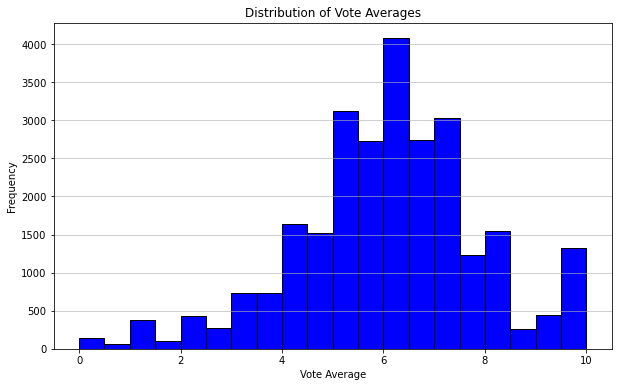

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('zippedData/tmdb.movies.csv.gz')

# Plotting the distribution of vote averages
plt.figure(figsize=(10, 6), facecolor='white')
plt.hist(df['vote_average'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Vote Averages')
plt.xlabel('Vote Average')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

The histogram shows that the majority of movies have vote averages clustered around the middle range, with a peak occurring between 6 and 7. This suggests that most movies in the dataset are rated above average but not exceptionally high.
In summary, the histogram provides a visual representation of the distribution of vote averages for movies in the dataset. It shows that most movies have vote averages in the middle range, with fewer movies having very low or very high ratings.



So we are going to create a scatterplot next with the data in the csv.file.

In [ ]:
import matplotlib.pyplot as plt

# Setting the background color to white for visibility
plt.figure(facecolor='white')

# Scatter plot for Popularity vs Vote Average
plt.scatter(df['popularity'], df['vote_average'], alpha=0.5)
plt.title('Popularity vs Vote Average')
plt.xlabel('Popularity')
plt.ylabel('Vote Average')
plt.show()

# Scatter plot for Popularity vs Vote Count
plt.figure(facecolor='white')
plt.scatter(df['popularity'], df['vote_count'], alpha=0.5, color='green')
plt.title('Popularity vs Vote Count')
plt.xlabel('Popularity')
plt.ylabel('Vote Count')
plt.show()
print('Plots generated successfully.')